In [1]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
df

,HS6_i,HS6_j,n_ij,n_i,n_j,n,psim,psim_norm,link01,short_name_ENG_i,short_name_ENG_j
0,107111,107112,356,6275,6167,731532,6.729699,0.741258,1,Fresh bread containing by,Cake and pastry products;
1,181214,181219,60,4081,3683,731532,2.920225,0.489825,1,"Printed books, brochures,",Printed calendars of any
2,181212,181214,59,3287,4081,731532,3.217504,0.525786,1,Printed commercial catalo,"Printed books, brochures,"
3,310112,310912,57,3568,3342,731532,3.496849,0.555244,1,Wooden furniture of a kin,Wooden bedroom furniture
4,181213,181214,55,2586,4081,731532,3.812421,0.584409,1,"Printed newspapers, journ","Printed books, brochures,"
...,...,...,...,...,...,...,...,...,...,...,...
40086,242034,289230,1,1226,1175,731532,0.507814,-0.326423,0,"Tubes and pipes, of non-c",Pile-drivers and pile-ext
40087,242034,289227,1,1226,969,731532,0.615771,-0.237799,0,"Tubes and pipes, of non-c",Bulldozer or angledozer b
40088,242034,282983,1,1226,1097,731532,0.543922,-0.295403,0,"Tubes and pipes, of non-c",Cylinders for calendering
40089,242034,282922,1,1226,1720,731532,0.346908,-0.484882,0,"Tubes and pipes, of non-c",Fire extinguishers


In [2]:
G = nx.Graph()

# Add the nodes

unique_product_codes = set(df['HS6_i']).union(set(df['HS6_j']))

G.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G.add_edge(product_i, product_j, weight=weight)

# nx.draw(G,node_size=50,with_labels=True)


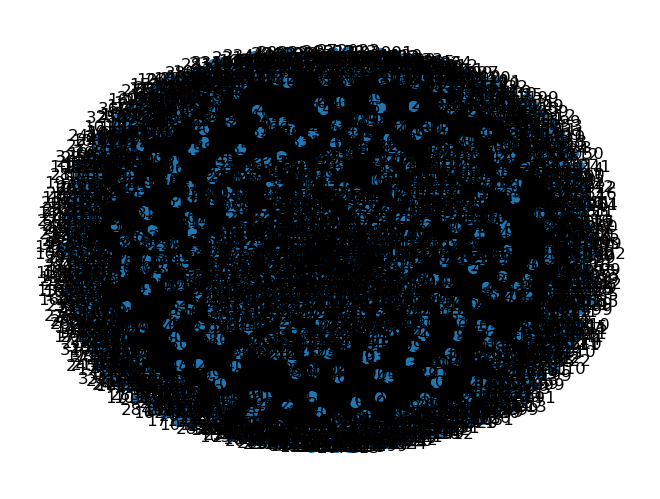

In [3]:
# Calculate the total value of weights
total_weight = sum([d['weight'] for u, v, d in G.edges(data=True)])

# Normalize weights using the total value
for u, v, d in G.edges(data=True):
    d['weight'] /= total_weight

nx.draw(G,node_size=50,with_labels=True)


Density: 0.04331914249902753
Average total degree: 58.914033798677444


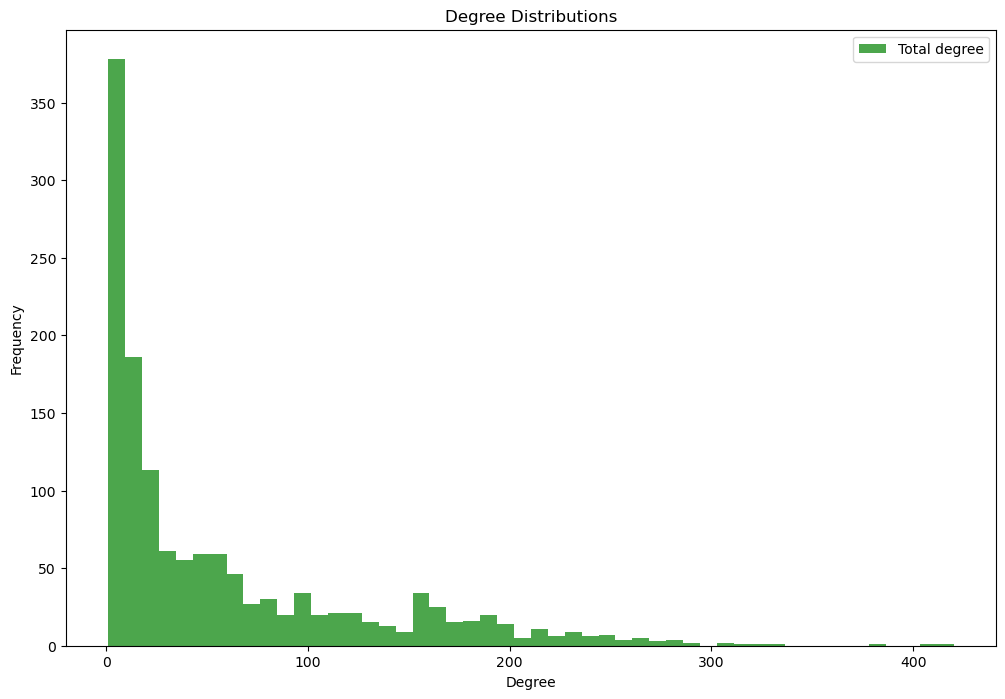

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density = nx.density(G)
print("Density:", density)

# Average degrees
total_degrees = dict(G.degree())


average_total_degree = sum(total_degrees.values()) / len(total_degrees)

print("Average total degree:", average_total_degree)

# Degree distributions

total_degree_sequence = [degree for node, degree in G.degree()]

# Plot degree distributions
plt.figure(figsize=(12, 8))

plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distributions')
plt.legend()
plt.show()

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Density
density1 = nx.density(G)
print("Density:", density1)

# Identify isolated nodes
isolated_nodes = [node for node, degree in G.degree() if degree == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Compute the largest weakly connected component
largest_weakly_connected_component_nodes = max(nx.connected_components(G), key=len)
largest_weakly_connected_component = G.subgraph(largest_weakly_connected_component_nodes)


density2 = nx.density(largest_weakly_connected_component)
print("Density_largest_connected_component:", density2)

Density: 0.04331914249902753
Density_largest_connected_component: 0.04331914249902753


Calculating best minimal value for power law fit


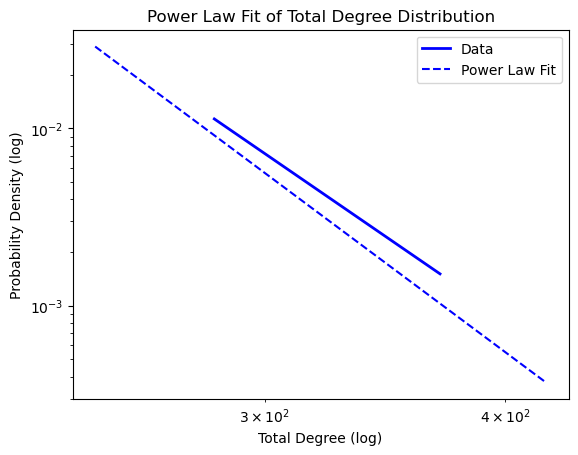

Alpha (scaling parameter): 8.088010355444128
Xmin (minimum value of the power law distribution): 245.0


In [6]:
import powerlaw

# Fit power law to the total degree distribution
fit = powerlaw.Fit(total_degree_sequence)

# Get the alpha (scaling parameter) and xmin (minimum value of the power law distribution)
alpha = fit.alpha
xmin = fit.xmin

# Plot the degree distribution and the power law fit
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig)

# Visualize the data and the fit on a log-log scale
plt.xlabel('Total Degree (log)')
plt.ylabel('Probability Density (log)')
plt.title('Power Law Fit of Total Degree Distribution')
plt.legend(['Data', 'Power Law Fit'])
plt.show()

print("Alpha (scaling parameter):", alpha)
print("Xmin (minimum value of the power law distribution):", xmin)


In [7]:
As = nx.adjacency_matrix(G)
A =As.todense()
print(A)


[[0.00000000e+00 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.69652552e-05 0.00000000e+00 0.00000000e+00 ... 1.69652552e-05
  1.69652552e-05 1.69652552e-05]
 ...
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 0.00000000e+00
  1.69652552e-05 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  0.00000000e+00 1.69652552e-05]
 [1.69652552e-05 0.00000000e+00 1.69652552e-05 ... 1.69652552e-05
  1.69652552e-05 0.00000000e+00]]


In [8]:
d = nx.degree(G)
d = dict(d)

print("average degree: ", sum(d.values())/len(G.nodes))

average degree:  58.914033798677444


In [9]:
nx.degree_histogram(G)

[0,
 47,
 56,
 48,
 53,
 35,
 43,
 33,
 25,
 38,
 26,
 22,
 35,
 25,
 25,
 19,
 15,
 19,
 18,
 14,
 14,
 15,
 11,
 10,
 14,
 10,
 7,
 6,
 9,
 13,
 8,
 6,
 4,
 10,
 5,
 8,
 9,
 8,
 7,
 5,
 7,
 5,
 6,
 7,
 9,
 3,
 8,
 5,
 12,
 7,
 1,
 7,
 12,
 6,
 8,
 7,
 9,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 3,
 5,
 7,
 2,
 2,
 2,
 3,
 3,
 2,
 6,
 5,
 4,
 5,
 3,
 6,
 3,
 3,
 3,
 5,
 2,
 0,
 5,
 1,
 3,
 1,
 3,
 4,
 2,
 1,
 1,
 7,
 0,
 6,
 3,
 5,
 7,
 5,
 4,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 0,
 4,
 1,
 3,
 5,
 1,
 6,
 3,
 3,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 4,
 2,
 1,
 0,
 2,
 0,
 3,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 8,
 8,
 1,
 6,
 2,
 1,
 7,
 5,
 2,
 4,
 4,
 4,
 1,
 1,
 4,
 3,
 1,
 3,
 2,
 3,
 2,
 0,
 1,
 1,
 1,
 3,
 4,
 1,
 0,
 2,
 4,
 0,
 3,
 3,
 2,
 5,
 1,
 0,
 1,
 5,
 1,
 3,
 0,
 0,
 3,
 2,
 2,
 3,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 0,
 0,
 2,

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

(0.0, 440.0)

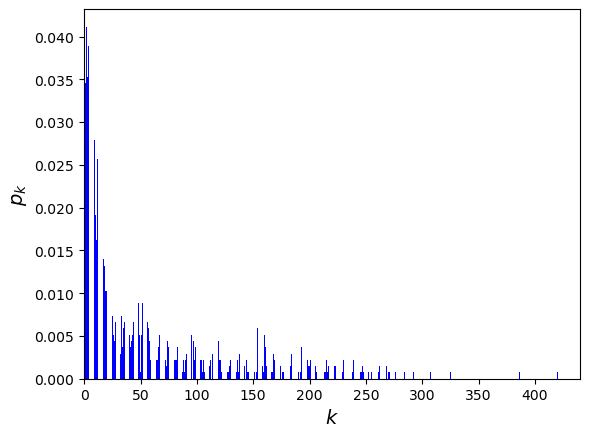

In [10]:
import matplotlib.pyplot as plt
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="blue")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,440])

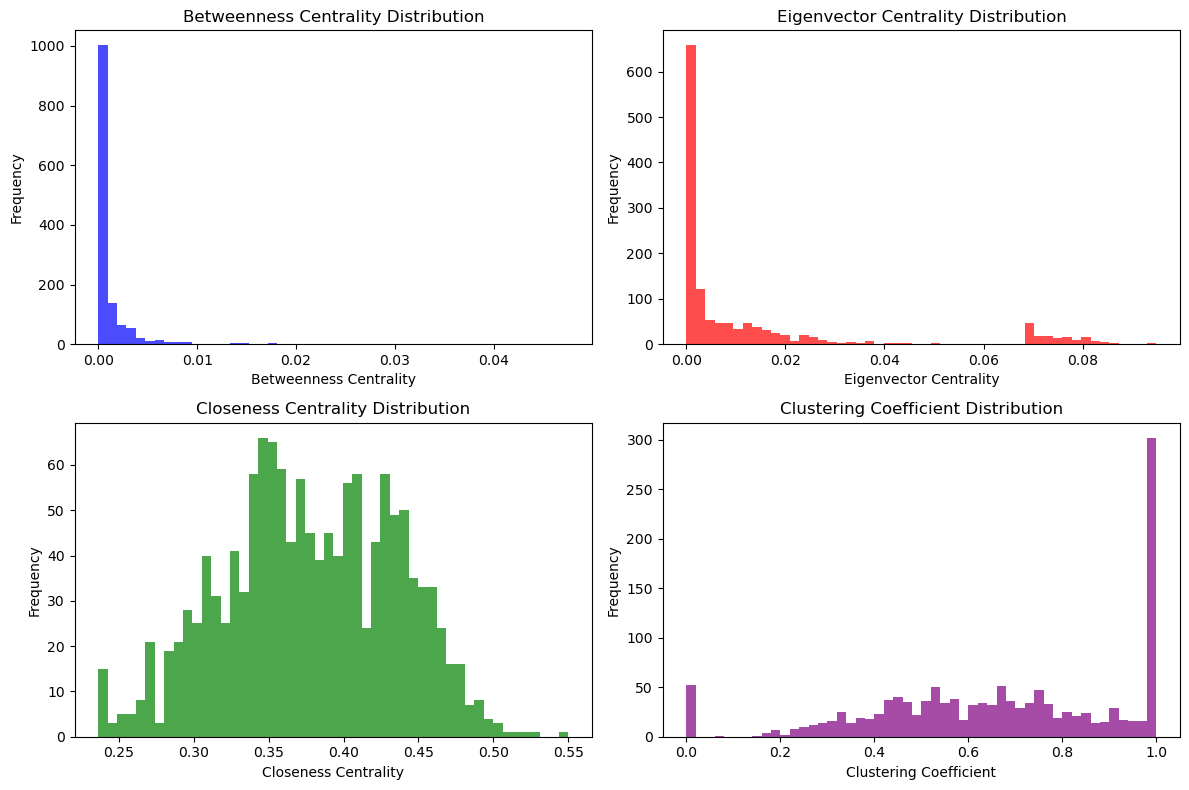

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Clustering Coefficient
clustering = nx.clustering(G)

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(betweenness.values()), bins=50, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(eigenvector.values()), bins=50, color='red', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness.values()), bins=50, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(clustering.values()), bins=50, color='purple', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
import networkx as nx
import pandas as pd

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_ranked_products = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_ranked_products = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_ranked_products = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
clustering_ranked_products = sorted(clustering_coefficient, key=clustering_coefficient.get, reverse=True)

# Create DataFrames for each centrality metric
betweenness_df = pd.DataFrame({
    'Rank': range(1, len(betweenness_ranked_products) + 1),
    'HS6_Code': betweenness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in betweenness_ranked_products],
    'Betweenness_Centrality': [betweenness_centrality[product] for product in betweenness_ranked_products]
})

eigenvector_df = pd.DataFrame({
    'Rank': range(1, len(eigenvector_ranked_products) + 1),
    'HS6_Code': eigenvector_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in eigenvector_ranked_products],
    'Eigenvector_Centrality': [eigenvector_centrality[product] for product in eigenvector_ranked_products]
})

closeness_df = pd.DataFrame({
    'Rank': range(1, len(closeness_ranked_products) + 1),
    'HS6_Code': closeness_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in closeness_ranked_products],
    'Closeness_Centrality': [closeness_centrality[product] for product in closeness_ranked_products]
})

clustering_df = pd.DataFrame({
    'Rank': range(1, len(clustering_ranked_products) + 1),
    'HS6_Code': clustering_ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in clustering_ranked_products],
    'Clustering_Coefficient': [clustering_coefficient[product] for product in clustering_ranked_products]
})

# Save DataFrames to Excel file with different sheet names
output_file = './Data/centrality_rankings_similarity.xlsx'  # Change the file name and path as needed
with pd.ExcelWriter(output_file) as writer:
    betweenness_df.to_excel(writer, sheet_name='Betweenness_Centrality', index=False)
    eigenvector_df.to_excel(writer, sheet_name='Eigenvector_Centrality', index=False)
    closeness_df.to_excel(writer, sheet_name='Closeness_Centrality', index=False)
    clustering_df.to_excel(writer, sheet_name='Clustering_Coefficient', index=False)


Average Shortest Path Length (Largest Connected Component): 2.7154849375459222
Longest Path Length: 7


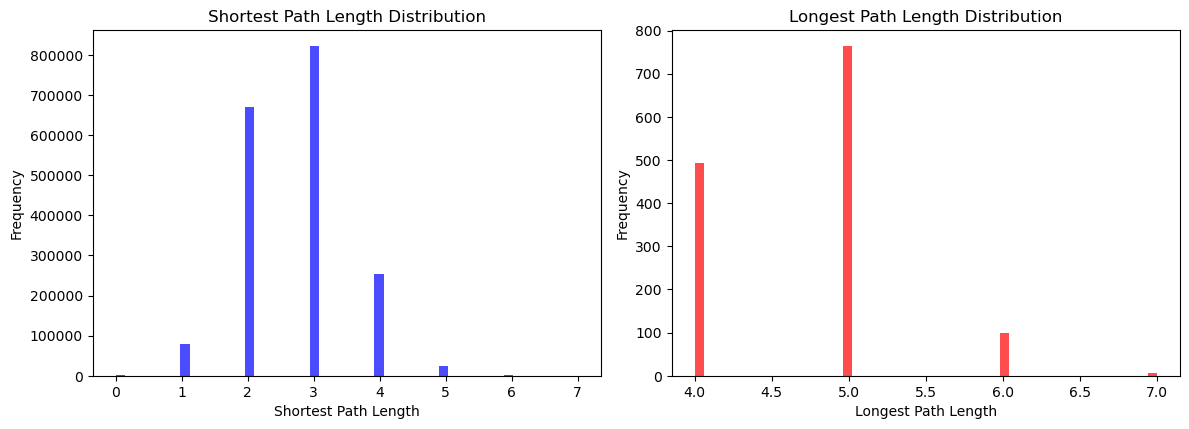

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already created the directed graph G

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Compute the average shortest path length for the largest connected component
average_shortest_path_length_largest_component = nx.average_shortest_path_length(G.subgraph(largest_connected_component))
print("Average Shortest Path Length (Largest Connected Component):", average_shortest_path_length_largest_component)

# Average/general longest path length
# Longest path length can be computed by finding the diameter of the largest connected component
longest_path_length = nx.diameter(G.subgraph(largest_connected_component))
print("Longest Path Length:", longest_path_length)

# Shortest path length distributions
all_shortest_paths = nx.shortest_path_length(G)
shortest_path_lengths = [length for node, lengths in all_shortest_paths for length in lengths.values() if node in largest_connected_component]

# Longest path length distributions
all_longest_paths = nx.all_pairs_shortest_path_length(G)
longest_path_lengths = [max(lengths.values()) for _, lengths in all_longest_paths if _ in largest_connected_component]

# Plot distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(shortest_path_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Shortest Path Length Distribution')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(longest_path_lengths, bins=50, color='red', alpha=0.7)
plt.title('Longest Path Length Distribution')
plt.xlabel('Longest Path Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [17]:
# Average/general longest path length
# Longest path length can be computed by finding the diameter of the largest connected component
longest_path_length = nx.diameter(G.subgraph(largest_connected_component))
print("Longest Path Length:", longest_path_length)

# Find the longest path
longest_paths = nx.all_pairs_shortest_path(G.subgraph(largest_connected_component))
longest_path_nodes = max(longest_paths, key=lambda x: len(x[1]))[1]

# Print names of all nodes in the longest path
print("Nodes in the Longest Path:")
for node in longest_path_nodes:
    print(node)

Longest Path Length: 7
Nodes in the Longest Path:
131081
131061
131050
310914
310911
310113
139216
132020
131085
131083
131071
131062
131040
310210
222923
222929
310991
310112
293230
222991
264051
222130
275130
310913
310912
222213
329999
310012
222219
222319
222312
201352
203011
201113
205210
205943
204132
222214
222141
162114
281331
281314
266011
221920
201657
222129
222110
221973
221930
222211
265184
262040
203022
222924
257399
272021
259213
244311
236410
201341
272024
272022
274042
383233
353011
351110
309240
310091
234210
310020
289939
272023
293123
275123
275122
275121
274030
274021
264041
162311
324039
256220
251123
259929
256122
283092
292021
256111
289952
283093
132031
271240
242033
310014
162413
139912
259111
310312
251210
181214
139229
323015
222926
256210
331221
251110
257214
282219
251199
331215
331111
331910
251299
281323
281211
281313
282530
282923
282912
282511
289112
282984
281510
281411
281526
279041
139213
139214
279011
139211
281141
162399
309230
279070
281133
27329

In [14]:
import networkx as nx

# Assuming you have already created the directed graph G

# Identify isolated nodes
isolated_nodes = [node for node in G if G.degree(node) == 0]

# Remove isolated nodes
G.remove_nodes_from(isolated_nodes)

# Get the largest connected component
largest_connected_component = max(nx.connected_components(G), key=len)

# Compute the subgraph of the largest connected component
largest_connected_subgraph = G.subgraph(largest_connected_component)

# Compute the shortest path lengths between all pairs of nodes
all_shortest_paths = nx.shortest_path_length(largest_connected_subgraph)

# Initialize variables to store the products with the longest and shortest paths
products_longest_path = set()
products_shortest_path = set()

# Iterate over all pairs of nodes and their shortest path lengths
for source, lengths in all_shortest_paths:
    for target, length in lengths.items():
        if source != target and length >= 2:  # Exclude the node itself and paths of length 1
            if length == max(lengths.values()):  # Longest path
                products_longest_path.add(source)
                products_longest_path.add(target)
            elif length == min(lengths.values()):  # Shortest path
                products_shortest_path.add(source)
                products_shortest_path.add(target)

print("Products in the network with the longest path lengths:", products_longest_path)
print("Products in the network with the shortest path lengths (>=2):", products_shortest_path)


KeyboardInterrupt: 

In [ ]:
import networkx as nx
import pandas as pd

# Assuming you have already created the directed graph G

# Generate all simple paths in the graph
all_paths = []
for source in G.nodes():
    for target in G.nodes():
        if source != target:
            paths = nx.all_simple_paths(G, source=source, target=target)
            all_paths.extend(paths)

# Calculate the length of each path
path_lengths = [len(path) for path in all_paths]

# Sort paths by length
sorted_paths = [path for _, path in sorted(zip(path_lengths, all_paths))]

# Convert nodes in paths to product names based on the ranking
def get_product_name(node):
    return df.loc[df['HS6_i'] == node, 'short_name_ENG_i'].iloc[0] if node in df['HS6_i'].values \
        else df.loc[df['HS6_j'] == node, 'short_name_ENG_j'].iloc[0]

sorted_paths_with_names = [[get_product_name(node) for node in path] for path in sorted_paths]

# Save the paths to a CSV file
output_file = './Data/all_paths_similarity.csv'  # Change the file name and path as needed
with open(output_file, 'w') as file:
    for path in sorted_paths_with_names:
        file.write(','.join(path) + '\n')


KeyboardInterrupt: 

In [ ]:
import networkx as nx

# Assuming you have already created the directed graph G

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
highest_bc_product = max(betweenness_centrality, key=betweenness_centrality.get)
print("Product with Highest Betweenness Centrality:", highest_bc_product)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
highest_ec_product = max(eigenvector_centrality, key=eigenvector_centrality.get)
print("Product with Highest Eigenvector Centrality:", highest_ec_product)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
highest_cc_product = max(closeness_centrality, key=closeness_centrality.get)
print("Product with Highest Closeness Centrality:", highest_cc_product)



Product with Highest Betweenness Centrality: 222929
Product with Highest Eigenvector Centrality: 222929
Product with Highest Closeness Centrality: 222929


In [ ]:
import networkx as nx
import community


# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity)

# Community Detection
# Girvan-Newman algorithm
communities_gn = nx.community.girvan_newman(G)
best_partition_gn = next(communities_gn)
print("Communities (Girvan-Newman):", best_partition_gn)

# Louvain algorithm
# partition_louvain = community.best_partition(G)
# print("Communities (Louvain):", partition_louvain)



Assortativity Coefficient: 0.25185282280165344
Communities (Girvan-Newman): ({131081, 131082, 131083, 131085, 221199, 131092, 131099, 139299, 139311, 139312, 139313, 352310, 139319, 254011, 254012, 254013, 254014, 172111, 172112, 172113, 172114, 172115, 139411, 139412, 139420, 172199, 172211, 172212, 139499, 139510, 172299, 172311, 172312, 172313, 172314, 205111, 205112, 205114, 139599, 139613, 139614, 139615, 139616, 139617, 172399, 172411, 205210, 139699, 279011, 279012, 279013, 279020, 279031, 279032, 279033, 205310, 279041, 279043, 279044, 279045, 279052, 279053, 279060, 279070, 279082, 279099, 205399, 107111, 107112, 139911, 139912, 139913, 139915, 139919, 107199, 107211, 99019, 107212, 107219, 221910, 139999, 221920, 221930, 353011, 221940, 353012, 221950, 271110, 221960, 271121, 271122, 271123, 271124, 221973, 271125, 221971, 271132, 271141, 271142, 271143, 271150, 221999, 107311, 107312, 271161, 271162, 271199, 263011, 263012, 263013, 271210, 263022, 172911, 263023, 271221, 263

In [ ]:
import networkx as nx

def average_shortest_path_length(graph):
    shortest_path_lengths = []

    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=source, target=target)
                    shortest_path_lengths.append(shortest_path_length)
                except nx.NetworkXNoPath:
                    pass

    return sum(shortest_path_lengths) / len(shortest_path_lengths) if shortest_path_lengths else float('nan')

# Assuming you have already created the directed graph G

# Get the number of nodes and edges in the dependency network
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# Calculate the edge probability for the ER random graph
p = num_edges / (num_nodes * (num_nodes - 1))

# Generate the equivalent ER random graph 10 times and compute the average shortest path length and clustering coefficient
avg_shortest_path_er_total = 0
clustering_coeff_er_total = 0
num_iterations = 100

for _ in range(num_iterations):
    er_graph = nx.erdos_renyi_graph(num_nodes, p)
    avg_shortest_path_er_total += average_shortest_path_length(er_graph)
    clustering_coeff_er_total += nx.average_clustering(er_graph)

avg_shortest_path_er_avg = avg_shortest_path_er_total / num_iterations
clustering_coeff_er_avg = clustering_coeff_er_total / num_iterations

# Print the average results
print("ER Random Graph (Average of 100 runs):")
print("- Average Shortest Path Length:", avg_shortest_path_er_avg)
print("- Clustering Coefficient:", clustering_coeff_er_avg)


ER Random Graph (Average of 100 runs):
- Average Shortest Path Length: 2.4949210895967506
- Clustering Coefficient: 0.021678965309589647


In [ ]:
import networkx as nx

# Assuming you have already created the directed graph G

# Step 1: Calculate node vulnerability
def calculate_node_vulnerability(G, node):
    degree_centrality = nx.degree_centrality(G)
    neighbor_vulnerabilities = [degree_centrality[neighbor] for neighbor in G.neighbors(node)]
    node_vulnerability = degree_centrality[node] * sum(neighbor_vulnerabilities)
    return node_vulnerability

node_vulnerabilities = {node: calculate_node_vulnerability(G, node) for node in G.nodes()}

# Step 2: Calculate Economic Systemic Risk Index (ESRI)
def calculate_esri(G, node, node_vulnerabilities):
    esri = 0
    for neighbor in G.neighbors(node):
        edge_weight = G[node][neighbor]['weight']
        esri += node_vulnerabilities[neighbor] * edge_weight
    return esri

esri_scores = {node: calculate_esri(G, node, node_vulnerabilities) for node in G.nodes()}

# Rank products by ESRI scores
ranked_products = sorted(esri_scores, key=esri_scores.get, reverse=True)

# Print ranked products with ESRI scores
print("Ranked Products by ESRI Scores:")
for i, product in enumerate(ranked_products, start=1):
    print(f"{i}. Product: {product} | ESRI Score: {esri_scores[product]}")

# Print systemically risky products (top 10 for example)
top_risky_products = ranked_products[:10]  # Adjust the number as needed
print("\nTop Systemically Risky Products:")
for product in top_risky_products:
    print(product)


Ranked Products by ESRI Scores:
1. Product: 259929 | ESRI Score: 0.04523659880960852
2. Product: 251123 | ESRI Score: 0.03918843174252662
3. Product: 222929 | ESRI Score: 0.03885841434609567
4. Product: 271231 | ESRI Score: 0.03648618862943695
5. Product: 271240 | ESRI Score: 0.0337048897387562
6. Product: 273313 | ESRI Score: 0.0324282052892441
7. Product: 256220 | ESRI Score: 0.030132586358358672
8. Product: 293230 | ESRI Score: 0.029521285453347437
9. Product: 279041 | ESRI Score: 0.029002662372828086
10. Product: 273311 | ESRI Score: 0.02888148380939362
11. Product: 289939 | ESRI Score: 0.02807243369439682
12. Product: 279044 | ESRI Score: 0.02726849808650705
13. Product: 265185 | ESRI Score: 0.026196235477389338
14. Product: 282219 | ESRI Score: 0.02479328129189951
15. Product: 221973 | ESRI Score: 0.024538743724543323
16. Product: 274030 | ESRI Score: 0.02438680968325396
17. Product: 259411 | ESRI Score: 0.024369392825405314
18. Product: 273213 | ESRI Score: 0.02412896860575129
1

In [ ]:
import networkx as nx
import pandas as pd

# Load the CSV data
df = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')

# Assuming you have already created the directed graph G

# Step 1: Calculate node vulnerability
def calculate_node_vulnerability(G, node):
    degree_centrality = nx.degree_centrality(G)
    neighbor_vulnerabilities = [degree_centrality[neighbor] for neighbor in G.neighbors(node)]
    node_vulnerability = degree_centrality[node] * sum(neighbor_vulnerabilities)
    return node_vulnerability

node_vulnerabilities = {node: calculate_node_vulnerability(G, node) for node in G.nodes()}

# Step 2: Calculate Economic Systemic Risk Index (ESRI)
def calculate_esri(G, node, node_vulnerabilities):
    esri = 0
    for neighbor in G.neighbors(node):
        edge_weight = G[node][neighbor]['weight']
        esri += node_vulnerabilities[neighbor] * edge_weight
    return esri

esri_scores = {node: calculate_esri(G, node, node_vulnerabilities) for node in G.nodes()}

# Rank products by ESRI scores
ranked_products = sorted(esri_scores, key=esri_scores.get, reverse=True)

# Create a DataFrame to store the ranking, HS6 codes, short names, and ESRI scores
ranking_df = pd.DataFrame({
    'Rank': range(1, len(ranked_products) + 1),
    'HS6_Code': ranked_products,
    'Short_Name_ENG': [df.loc[df['HS6_i'] == product, 'short_name_ENG_i'].iloc[0] if product in df['HS6_i'].values
                       else df.loc[df['HS6_j'] == product, 'short_name_ENG_j'].iloc[0] for product in ranked_products],
    'ESRI_Score': [esri_scores[product] for product in ranked_products]
})

# Save the ranking and product names to a CSV file
output_file = './Data/esri_ranking_similarity.csv'  # Change the file name if needed
ranking_df.to_csv(output_file, index=False)
